In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\hkoli\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\hkoli\AppData\Roaming\Python\Python312\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\hkoli\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_lo

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\hkoli\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\hkoli\AppData\Roaming\Python\Python312\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\hkoli\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_lo

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.



In [2]:
df=pd.read_csv("Crop_recommendation.csv")
df

,Nitrogen,Phosphorus,Potassium,temperature,humidity,ph,hg/ha_yield,rainfall,label
0,90.0,42.0,43.0,20.879744,82.002744,6.502985,36613.0,202.935536,rice
1,85.0,58.0,41.0,21.770462,80.319644,7.038096,66667.0,226.655537,rice
2,60.0,55.0,44.0,23.004459,82.320763,7.840207,23333.0,263.964248,rice
3,74.0,35.0,40.0,26.491096,80.158363,6.980401,12500.0,242.864034,rice
4,78.0,42.0,42.0,20.130175,81.604873,7.628473,7000.0,262.717340,rice
...,...,...,...,...,...,...,...,...,...
28237,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28238,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28239,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.isnull().sum()

Nitrogen       26042
Phosphorus     26042
Potassium      26042
temperature    26042
humidity       26042
ph             26042
hg/ha_yield    26042
rainfall       26042
label          26042
dtype: int64

In [4]:
df.dropna(inplace=True)

In [5]:
df.count()

Nitrogen       2200
Phosphorus     2200
Potassium      2200
temperature    2200
humidity       2200
ph             2200
hg/ha_yield    2200
rainfall       2200
label          2200
dtype: int64

In [22]:
df["label"].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [7]:
df["label"].value_counts()

label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64

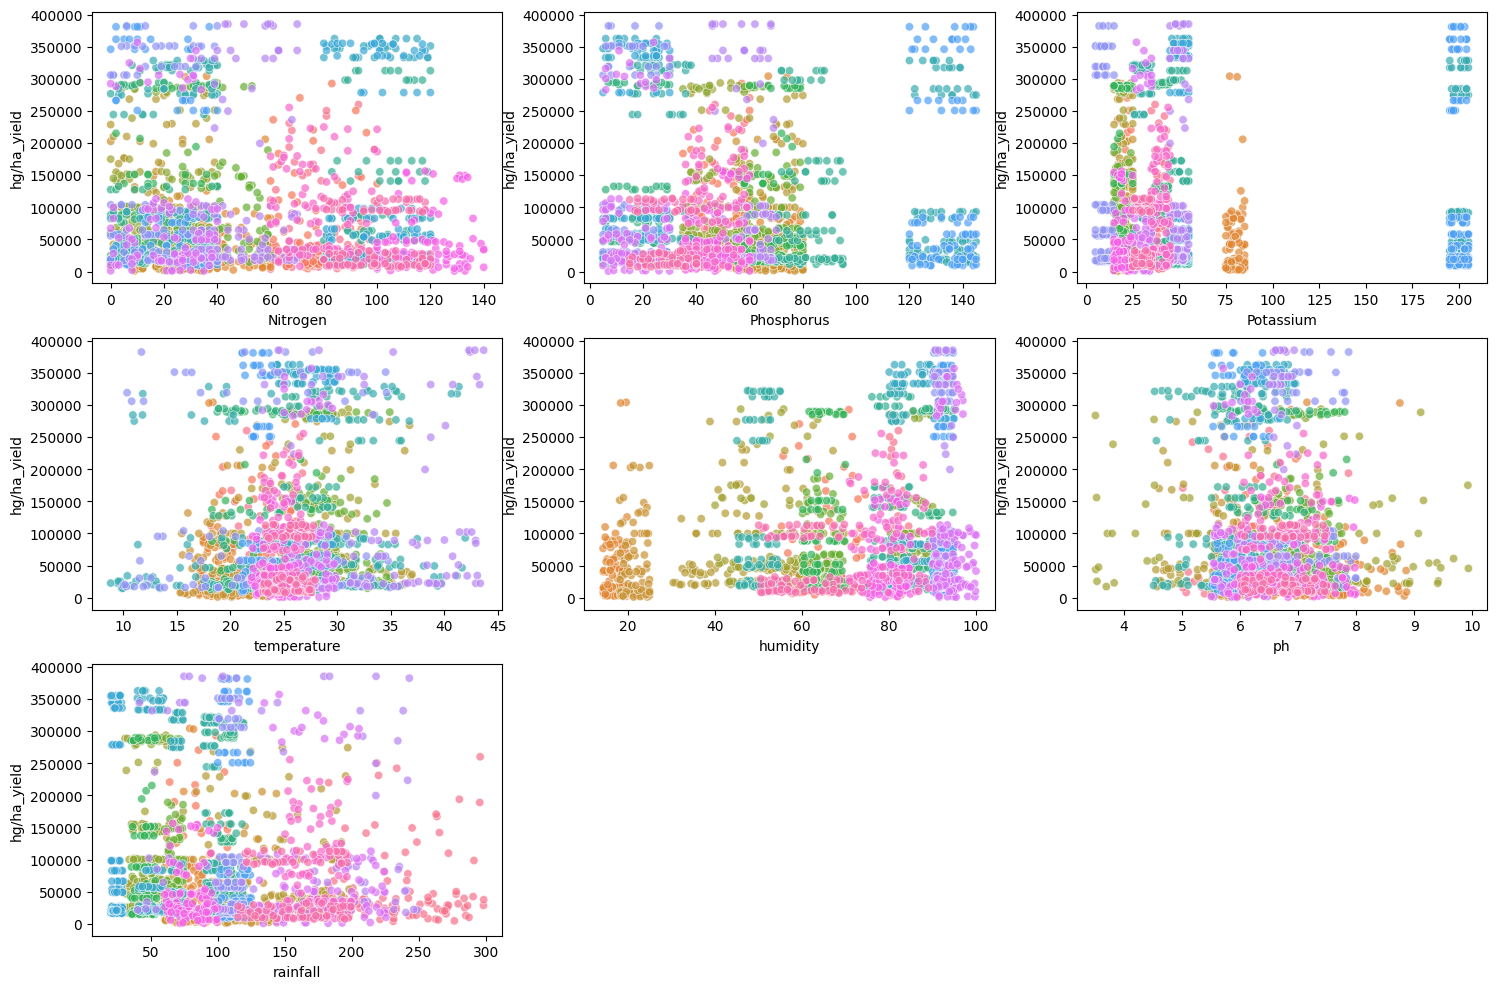

In [8]:
feature=['Nitrogen', 'Phosphorus', 'Potassium', 'temperature', 'humidity', 'ph', 'rainfall']
plt.figure(figsize=(18, 12))
for i,feature in enumerate(feature,1):
    plt.subplot(3, 3, i)
    sns.scatterplot(data=df,x=feature,y='hg/ha_yield', hue='label', alpha=0.7,legend=False )

plt.show()

<Axes: xlabel='hg/ha_yield', ylabel='Count'>

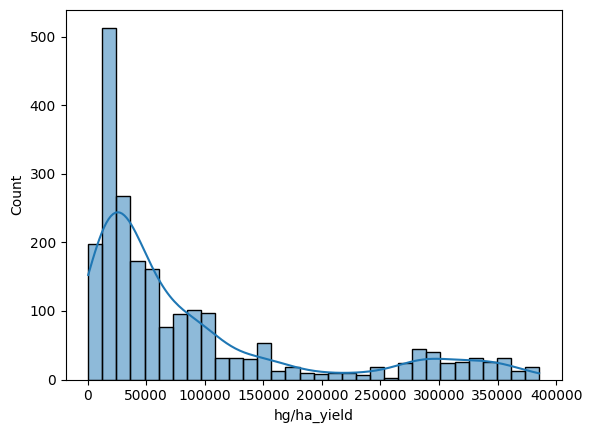

In [9]:
sns.histplot(data=df,x=df["hg/ha_yield"],kde=True)

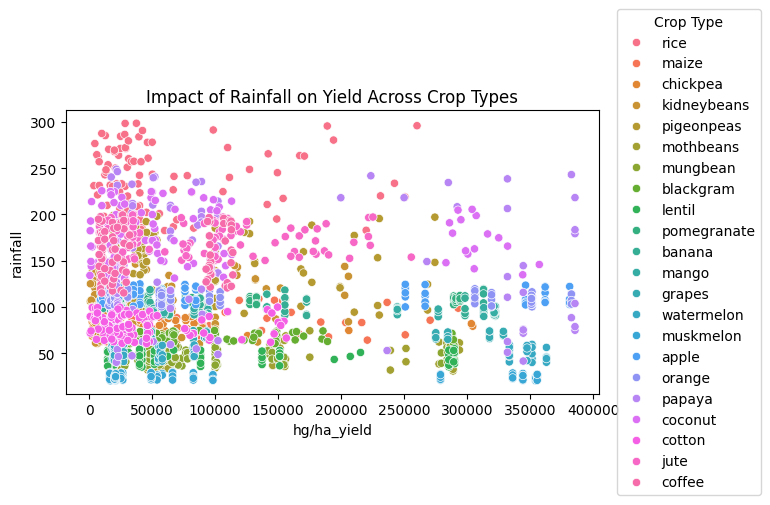

In [29]:
sns.scatterplot(data=df,x="hg/ha_yield",y="rainfall",hue="label")
plt.tight_layout()
plt.legend(loc='center left', bbox_to_anchor=(1.02, 0.5), title="Crop Type")
plt.title("Impact of Rainfall on Yield Across Crop Types")
plt.show()

C:\Users\hkoli\AppData\Local\Temp\ipykernel_20568\1387314817.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_yield.index, y=avg_yield.values, palette='Set2')


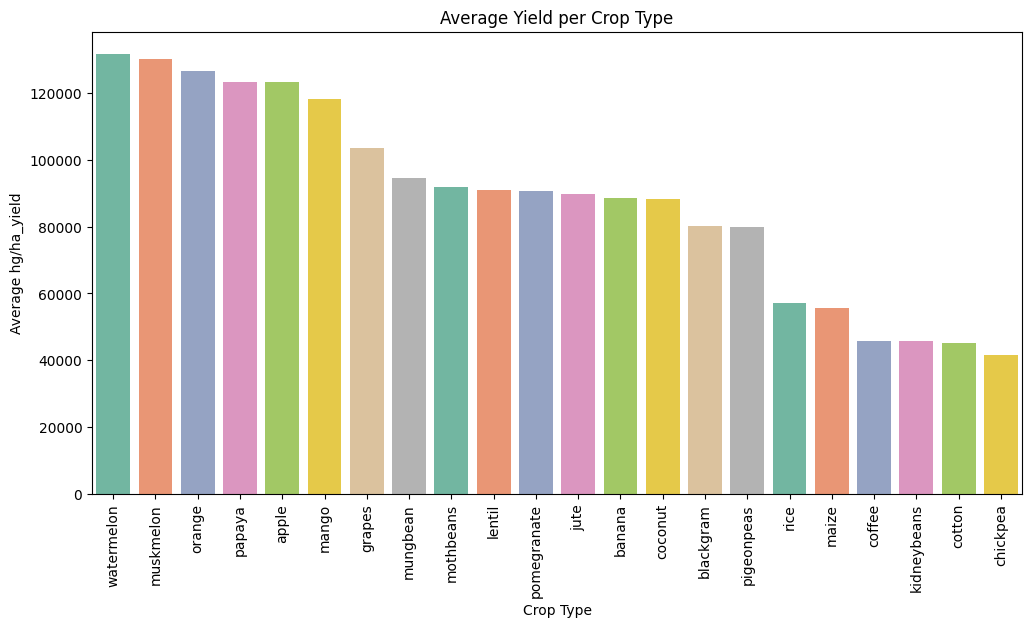

In [11]:
#  Average Yield per Crop Type
plt.figure(figsize=(12, 6))
avg_yield = df.groupby('label')['hg/ha_yield'].mean().sort_values(ascending=False)
sns.barplot(x=avg_yield.index, y=avg_yield.values, palette='Set2')
plt.xticks(rotation=90)
plt.title("Average Yield per Crop Type")
plt.xlabel("Crop Type")
plt.ylabel("Average hg/ha_yield")
plt.show()


In [12]:
correlation=df[['Nitrogen', 'Phosphorus', 'Potassium', 'temperature', 'humidity', 'ph', 'rainfall','hg/ha_yield']].corr()
correlation

,Nitrogen,Phosphorus,Potassium,temperature,humidity,ph,rainfall,hg/ha_yield
Nitrogen,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020,-0.046510
Phosphorus,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839,-0.007694
Potassium,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461,0.079890
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084,0.120706
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423,0.174224
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069,-0.037123
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000,-0.083225
hg/ha_yield,-0.046510,-0.007694,0.079890,0.120706,0.174224,-0.037123,-0.083225,1.000000


<Axes: >

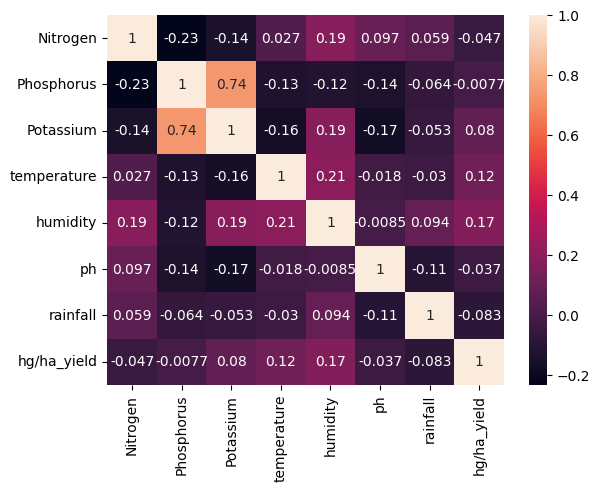

In [13]:
sns.heatmap(correlation,annot=True)

In [14]:
for i in df.select_dtypes(include=["float64","int64"]).columns:
    means=df[i].mean()
    mediams=df[i].median()
    mins=df[i].min()
    maxs=df[i].max()
    
    print(f"{i}:")
    print(f"  Mean   : {means:.2f}")
    print(f"  Median : {mediams:.2f}")
    print(f"  Min    : {mins:.2f}")
    print(f"  Max    : {maxs:.2f}")
    print("-" * 30)
    

Nitrogen:
  Mean   : 50.55
  Median : 37.00
  Min    : 0.00
  Max    : 140.00
------------------------------
Phosphorus:
  Mean   : 53.36
  Median : 51.00
  Min    : 5.00
  Max    : 145.00
------------------------------
Potassium:
  Mean   : 48.15
  Median : 32.00
  Min    : 5.00
  Max    : 205.00
------------------------------
temperature:
  Mean   : 25.62
  Median : 25.60
  Min    : 8.83
  Max    : 43.68
------------------------------
humidity:
  Mean   : 71.48
  Median : 80.47
  Min    : 14.26
  Max    : 99.98
------------------------------
ph:
  Mean   : 6.47
  Median : 6.43
  Min    : 3.50
  Max    : 9.94
------------------------------
hg/ha_yield:
  Mean   : 88308.61
  Median : 46471.00
  Min    : 578.00
  Max    : 385434.00
------------------------------
rainfall:
  Mean   : 103.46
  Median : 94.87
  Min    : 20.21
  Max    : 298.56
------------------------------


In [28]:
desribe=df[["humidity","ph","hg/ha_yield","rainfall"]]
desribe.describe()

,humidity,ph,hg/ha_yield,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000
mean,71.481779,6.469480,88308.607727,103.463655
std,22.263812,0.773938,99837.508149,54.958389
min,14.258040,3.504752,578.000000,20.211267
25%,60.261953,5.971693,20677.000000,64.551686
50%,80.473146,6.425045,46471.000000,94.867624
75%,89.948771,6.923643,100304.750000,124.267508
max,99.981876,9.935091,385434.000000,298.560117


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [16]:
x=df.drop("label",axis=1)
y=df["label"]

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=45)

In [42]:
model=RandomForestClassifier(n_estimators=1000,criterion='gini')
model.fit(x_train,y_train)

,n_estimators,1000
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [40]:
y_pred=model.predict(x_test)

In [41]:
accuracy_score(y_test,y_pred)

0.9977272727272727

In [21]:
import pickle
with open("crop_model.pkl", "wb") as model_file:
    pickle.dump(model, model_file)